# Universidad Nacional de Loja
## Evaluación práctica Unidad 2
- **Nombre: Jhandry Santiago Chimbo Rivera**
- **Carrera: Ingeniería en Computación**

Caso de estudio: Una empresa de e-commerce ha lanzado una campaña publicitaria digital en redes sociales durante un mes. Cuenta con diferentes datos sobre el tipo de anuncio (imagen, video, carrusel), plataforma utilizada (Instagram, Facebook, YouTube), presupuesto diario, número de impresiones, clics, conversiones, y costo por clic (CPC).

Como analista de datos, tu objetivo es evaluar la efectividad de la campaña y proponer mejoras para la próxima.

Para ello:

- Identificar un conjunto de datos que simule el caso de estudio propuesto.
- Implementar dos algoritmos de Machine Learning, siguiendo todas las etapas del proceso de desarrollo del modelo.
- Comparar los resultados obtenidos por ambos algoritmos y determinar cuál representa la mejor alternativa.
- Recomendar una herramienta para la visualización de datos, describiendo sus principales ventajas.

### Paso 1: Importar bibliotecas necesarias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


### Paso 2: Cargar los datos

In [2]:
df = pd.read_csv("social_media_ad_optimization.csv")
df.head()

,user_id,age,gender,location,interests,ad_id,ad_category,ad_platform,ad_type,impressions,clicks,conversion,time_spent_on_ad,day_of_week,device_type,engagement_score
0,U0001,58,M,USA,Food,A0001,Sportswear,Facebook,Image,3,0,0,3.38,Friday,Mobile,0.02
1,U0002,55,F,USA,Tech,A0002,Electronics,Facebook,Image,9,9,1,6.77,Saturday,Tablet,0.93
2,U0003,52,F,UK,Gaming,A0003,Luggage,Instagram,Image,13,12,1,13.26,Wednesday,Mobile,0.93
3,U0004,31,F,USA,Tech,A0004,Gadgets,Facebook,Video,14,5,0,24.41,Saturday,Desktop,0.28
4,U0005,52,M,India,Tech,A0005,Luggage,Instagram,Carousel,10,5,0,21.43,Monday,Tablet,0.35


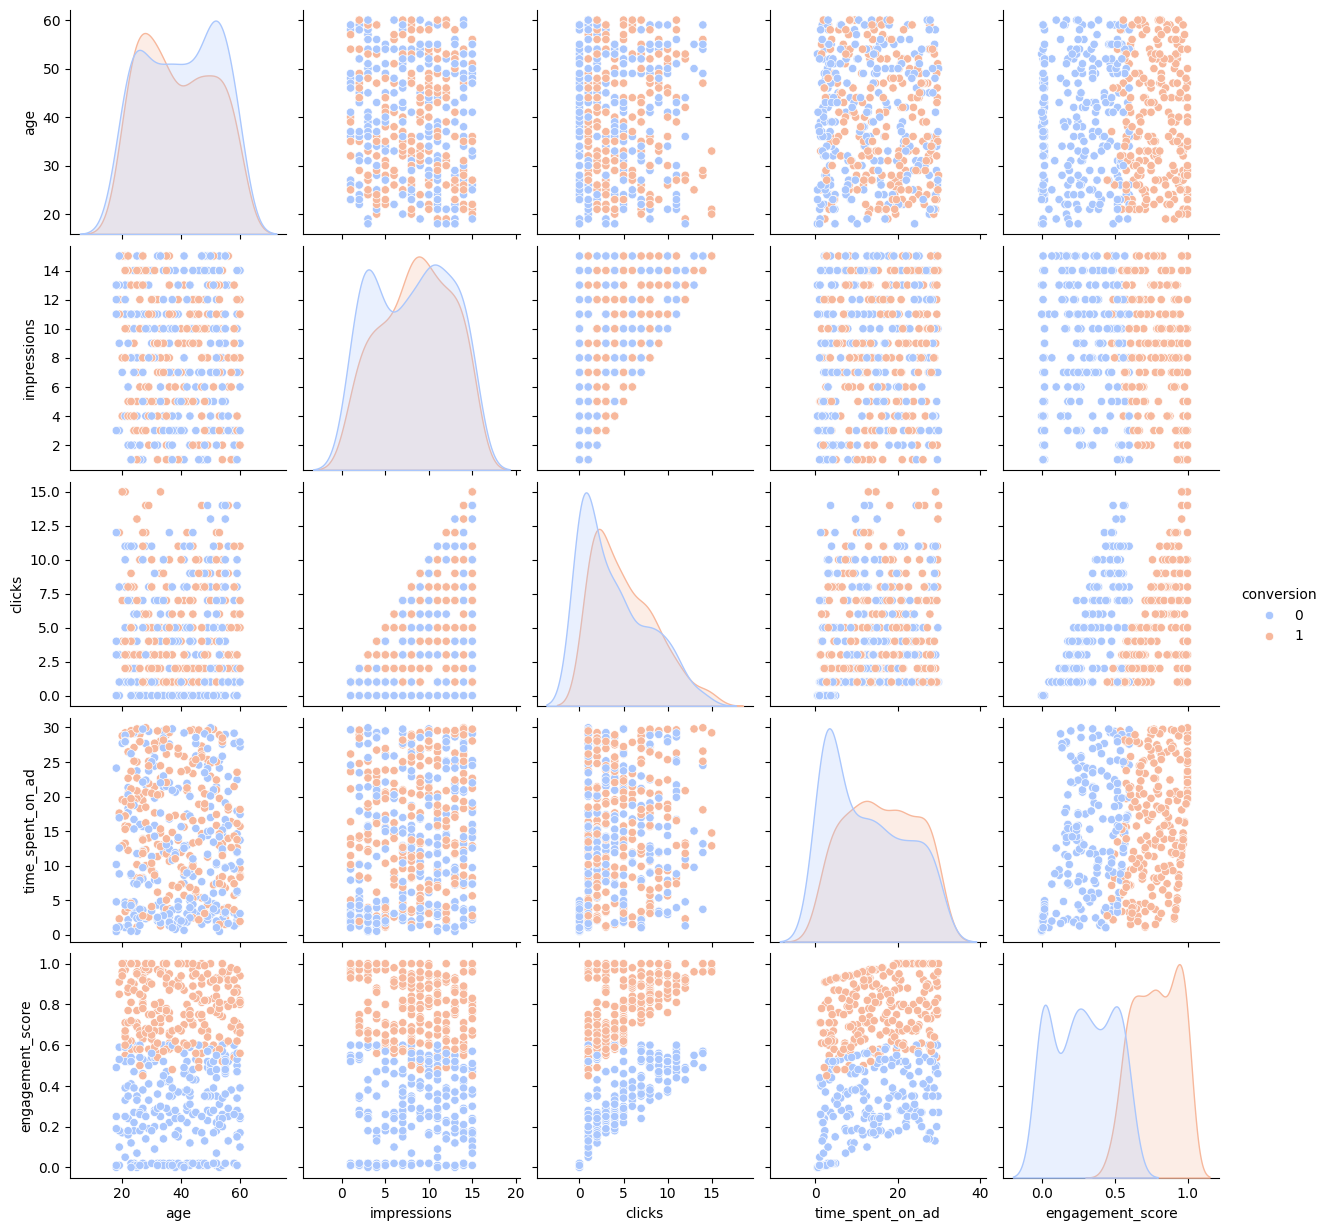

In [3]:
# Visualizar la distribución de las variables
sns.pairplot(df, hue= 'conversion', palette='coolwarm')

### Paso 3: Preprocesamiento

In [4]:
# Eliminar columnas no útiles
df = df.drop(columns=["user_id", "ad_id"])

# Codificar variables categóricas
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
# Separar características y variable objetivo
X = df.drop("conversion", axis=1)
y = df["conversion"]

In [6]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 13), (100, 13), (400,), (100,))

In [7]:
# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Paso 4: Entrenamiento con SVM

In [8]:
# Configurar el algoritmo
svm_model = SVC(kernel="rbf", C=1, gamma="scale", probability=True)

In [9]:
# Entrenamiento
svm_model.fit(X_train, y_train)

SVC(C=1, probability=True)

In [10]:
# Predicciones
svm_preds = svm_model.predict(X_test)
print(svm_preds)

[1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0]


In [11]:
print(y_test)

361    1
73     1
374    0
155    0
104    1
      ..
347    0
86     0
75     0
438    0
15     0
Name: conversion, Length: 100, dtype: int64


In [12]:
# Evaluación
print("📊 Resultados del modelo SVM:")
print(confusion_matrix(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

📊 Resultados del modelo SVM:
[[53  1]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.98      1.00      0.99        46

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [13]:
# Precisión del modelo SVM
svm_accuracy = svm_model.score(X_test, y_test)
print(f"Precisión del modelo SVM: {svm_accuracy:.2f}")

Precisión del modelo SVM: 0.99


<Axes: >

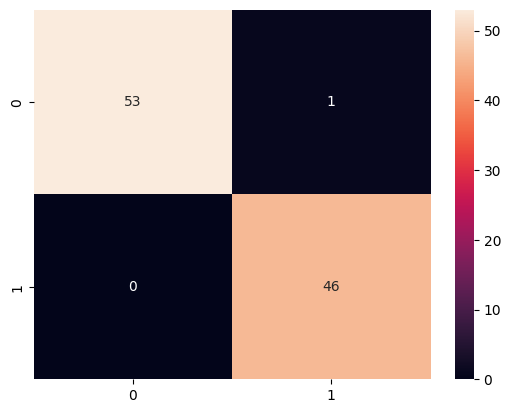

In [14]:
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt='d')

### Paso 5: Entrenamiento con Redes Neuronales Artificiales

In [15]:
# Entrenamiento
ann_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
ann_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)

In [16]:
# Predicciones
ann_preds = ann_model.predict(X_test)
print(ann_preds)

[1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0]


In [17]:
print(y_test)

361    1
73     1
374    0
155    0
104    1
      ..
347    0
86     0
75     0
438    0
15     0
Name: conversion, Length: 100, dtype: int64


In [18]:
# Evaluación del modelo
print("📊 Resultados del modelo ANN:")
print(confusion_matrix(y_test, ann_preds))
print(classification_report(y_test, ann_preds))

📊 Resultados del modelo ANN:
[[53  1]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.98      1.00      0.99        46

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [19]:
# Precisión del modelo ANN
ann_accuracy = ann_model.score(X_test, y_test)
print(f"Precisión del modelo ANN: {ann_accuracy:.2f}")

Precisión del modelo ANN: 0.99


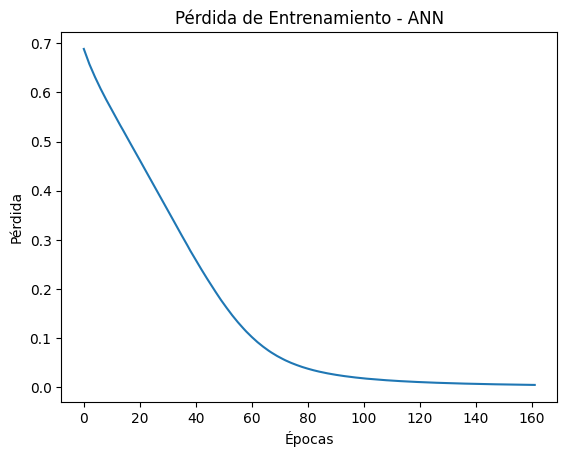

In [20]:
# Visualización de la perdida de entrenamiento de la red neuronal
plt.plot(ann_model.loss_curve_)
plt.title("Pérdida de Entrenamiento - ANN")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.show()

### Paso 6: Comparar visualmente resultados

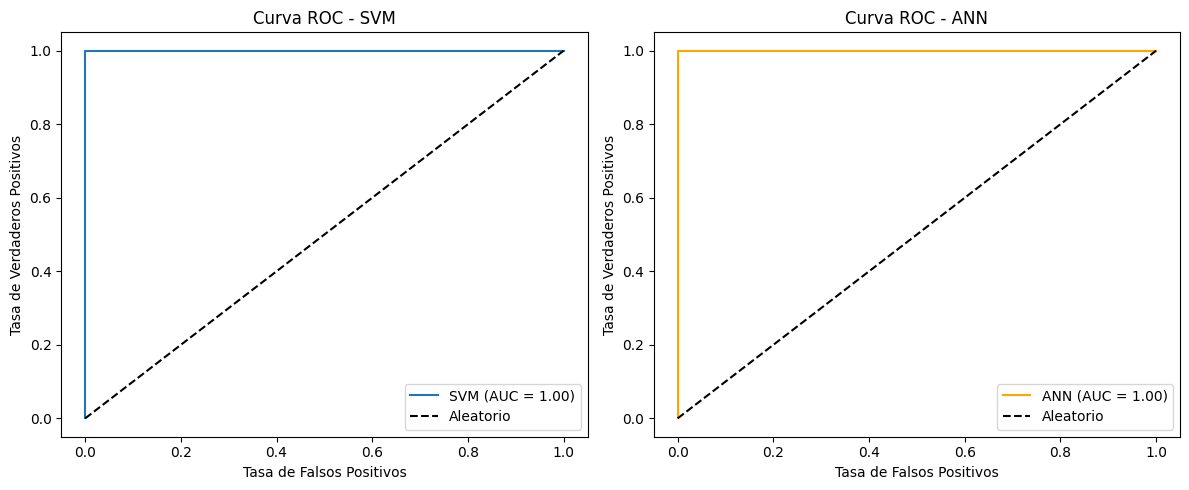

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
axes[0].plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
axes[0].plot([0, 1], [0, 1], 'k--', label='Aleatorio')
axes[0].set_xlabel('Tasa de Falsos Positivos')
axes[0].set_ylabel('Tasa de Verdaderos Positivos')
axes[0].set_title('Curva ROC - SVM')
axes[0].legend()

# ANN
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_model.predict_proba(X_test)[:, 1])
auc_ann = roc_auc_score(y_test, ann_model.predict_proba(X_test)[:, 1])
axes[1].plot(fpr_ann, tpr_ann, label=f"ANN (AUC = {auc_ann:.2f})", color='orange')
axes[1].plot([0, 1], [0, 1], 'k--', label='Aleatorio')
axes[1].set_xlabel('Tasa de Falsos Positivos')
axes[1].set_ylabel('Tasa de Verdaderos Positivos')
axes[1].set_title('Curva ROC - ANN')
axes[1].legend()

plt.tight_layout()
plt.show()

### 📊 Comparación de Resultados: SVM vs Redes Neuronales Artificiales (ANN)

#### ✅ Métricas de Evaluación Utilizadas

Para comparar el desempeño de los modelos de Machine Learning, se emplearon las siguientes métricas:

* **Curva ROC** (Receiver Operating Characteristic)
* **AUC** (Área Bajo la Curva ROC)
* **Precisión**
* **Curva de pérdida (solo ANN)**

---

#### 📈 Resultados Obtenidos

| Modelo  | AUC  | Precisión | Observaciones                                           |
| ------- | ---- | --------- | ------------------------------------------------------- |
| **SVM** | 1.00 | Muy alta  | Separación perfecta entre clases en los datos de prueba |
| **ANN** | 1.00 | Muy alta  | Excelente aprendizaje con convergencia rápida           |

Ambos modelos alcanzaron un **AUC de 1.00**, lo cual indica una **clasificación perfecta** de los casos en el conjunto de prueba. Este resultado sugiere que no hubo errores al distinguir entre conversiones positivas y negativas.

---

#### 📉 Curva de Pérdida - ANN

El modelo de red neuronal mostró una rápida disminución en la función de pérdida durante las épocas de entrenamiento, lo que indica que aprendió eficazmente los patrones del conjunto de entrenamiento sin evidencia de sobreajuste visible.

---

#### 🔎 Conclusión y Mejor Alternativa

Tanto el modelo **SVM** como el modelo de **Redes Neuronales Artificiales** demostraron un rendimiento sobresaliente en este caso de estudio. Sin embargo:

* **SVM** es más rápido de entrenar y más fácil de interpretar en contextos con datasets medianos o pequeños.
* **ANN**, si bien requiere más tiempo de entrenamiento, es más escalable y puede adaptarse mejor a patrones complejos en conjuntos de datos más grandes o con relaciones no lineales.

> **Recomendación final:**
> Para este conjunto de datos específico, **ambos modelos son adecuados**. Sin embargo, si se anticipa una expansión del volumen de datos o mayor complejidad, se recomienda utilizar **Redes Neuronales Artificiales (ANN)** por su capacidad de generalización.


### Paso 7: Recomendación de herramienta de visualización


Para facilitar el análisis y la presentación de los resultados de campañas publicitarias digitales, se recomienda utilizar una herramienta especializada en visualización de datos. Una opción destacada es:

#### **Power BI**

#### ✅ Ventajas Principales:

1. **Integración con múltiples fuentes de datos:**

   * Power BI se conecta fácilmente con archivos Excel, bases de datos SQL, servicios web, Google Analytics, entre otros.

2. **Interactividad avanzada:**

   * Permite crear paneles dinámicos e interactivos donde el usuario puede filtrar por plataforma, tipo de anuncio, fecha, etc.

3. **Automatización y actualizaciones:**

   * Es posible automatizar la actualización de los datos, lo que permite mantener siempre los paneles actualizados sin intervención manual.

4. **Accesibilidad y colaboración:**

   * Las visualizaciones pueden compartirse de forma segura en línea, integrarse en sitios web o verse desde dispositivos móviles.

5. **Costo accesible:**

   * Power BI Desktop es gratuito para la mayoría de usos individuales; solo se paga si se desea compartir paneles en la nube corporativa (Power BI Service).

6. **Facilidad de uso:**

   * Cuenta con una interfaz intuitiva de arrastrar y soltar, ideal tanto para principiantes como para usuarios avanzados.
